<a href="https://colab.research.google.com/github/Harinee-3010/html-portfolio/blob/main/imgtotxt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.53.0. You should pass an instance of `Cache` instead, e.g. `past_key_values=DynamicCache.from_legacy_cache(past_key_values)`.


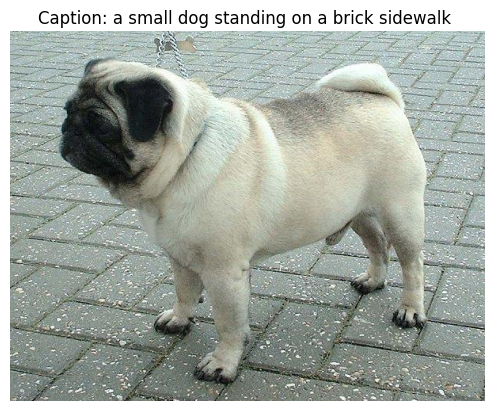

Generated Caption: a small dog standing on a brick sidewalk 


In [2]:
# STEP 1: Install required libraries
!pip install transformers
!pip install torchvision
!pip install pillow

# STEP 2: Import required libraries
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# STEP 3: Load the pretrained model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# STEP 4: Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# STEP 5: Caption generation function (Fixed: uses greedy decoding)
def generate_caption(image_path):
    image = Image.open(image_path)
    if image.mode != "RGB":
        image = image.convert(mode="RGB")

    # Preprocess image
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate caption using greedy decoding
    output_ids = model.generate(pixel_values, max_length=16)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    # Display the image and caption
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Caption: {caption}", fontsize=12)
    plt.show()
    return caption

# STEP 6: Download a test image from the internet
url = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg"  # Small dog image
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save("test.jpg")

# STEP 7: Generate and print the caption
caption = generate_caption("test.jpg")
print("Generated Caption:", caption)


Saving con.jpeg to con.jpeg


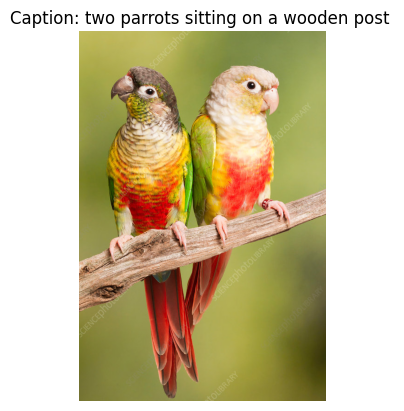

Generated caption: two parrots sitting on a wooden post 


In [3]:
from google.colab import files
uploaded = files.upload()

# Replace 'your_image.jpg' with the actual uploaded filename
caption = generate_caption("con.jpeg")
print("Generated caption:", caption)


Saving brownie.jpg to brownie.jpg


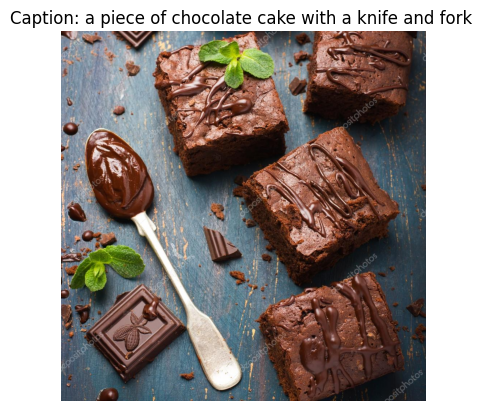

Generated caption: a piece of chocolate cake with a knife and fork 


In [6]:
from google.colab import files
uploaded = files.upload()

# Replace 'your_image.jpg' with the actual uploaded filename
caption = generate_caption("brownie.jpg")
print("Generated caption:", caption)